In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('data_dell2.csv')

In [5]:
data['Service Recommended'] = data['Service Recommended'].replace({"PSP ":"PSP"})
data['Wired/Wireless'] = data['Wired/Wireless'].replace({"Wired ":"Wired", "wireless":"Wireless"})
data['Type of Product'] = data['Type of Product'].replace({"H Disk":"HDisk", "Hdisk":"HDisk", "Headphones":"Headphone"})
data['Antivirus Purchase (yrs)'] = data['Antivirus Purchase (yrs)'].replace({"NO":"0"})

In [6]:
data.head()

,User id,Type of Product,Purchase Interval,Puchase Date,Warranty Expiry (months),Faulty software,Faulty hardware,Last BackUp,Antivirus Purchase (yrs),Services Used,Number of Tickets raised,Update Period,Last Update,Wired/Wireless,Service Recommended,Rating,Availability
0,1,PC,4,04-06-2015,0,Hang,Not Faulty,9,4,paid,1,1,29-11-2018,-1,SS,4,1
1,1,HDisk,1,12-06-2018,5,Not Faulty,Broken,4,1,free,2,2,11-10-2017,Wired,HS,4,1
2,2,Headphone,2,23-01-2017,5,-1,Not Faulty,-1,-1,free,0,-1,-1,Wired,DS,3,1
3,2,Mouse,2,29-09-2017,0,-1,Broken,-1,-1,paid,10,-1,-1,Wired,PS,3,1
4,2,PC,3,21-11-2018,1,Not Faulty,Battery,3,2,free,4,2,09-12-2017,-1,WS,4,0


In [7]:
data.describe()

,User id,Purchase Interval,Warranty Expiry (months),Last BackUp,Number of Tickets raised,Update Period,Rating,Availability
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,25.394231,2.201923,2.528846,1.653846,3.807692,-0.365385,3.009615,0.528846
std,14.423833,1.615338,3.500227,4.001867,2.790681,1.115275,1.325590,0.501584
min,1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000
25%,11.750000,1.000000,0.000000,-1.000000,2.000000,-1.000000,2.000000,0.000000
50%,25.000000,2.000000,1.000000,-1.000000,3.000000,-1.000000,3.000000,1.000000
75%,38.000000,4.000000,4.250000,3.250000,5.000000,0.000000,4.000000,1.000000
max,50.000000,6.000000,12.000000,12.000000,10.000000,3.000000,5.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 17 columns):
User id                     104 non-null int64
Type of Product             104 non-null object
Purchase Interval           104 non-null int64
Puchase Date                104 non-null object
Warranty Expiry (months)    104 non-null int64
Faulty software             104 non-null object
Faulty hardware             104 non-null object
Last BackUp                 104 non-null int64
Antivirus Purchase (yrs)    104 non-null object
Services Used               104 non-null object
Number of Tickets raised    104 non-null int64
Update Period               104 non-null int64
Last Update                 104 non-null object
Wired/Wireless              104 non-null object
Service Recommended         104 non-null object
Rating                      104 non-null int64
Availability                104 non-null int64
dtypes: int64(8), object(9)
memory usage: 10.2+ KB


In [9]:
data1 = data.drop(['Puchase Date','Last Update'], axis=1, inplace=True)

In [10]:
data.head(10)

,User id,Type of Product,Purchase Interval,Warranty Expiry (months),Faulty software,Faulty hardware,Last BackUp,Antivirus Purchase (yrs),Services Used,Number of Tickets raised,Update Period,Wired/Wireless,Service Recommended,Rating,Availability
0,1,PC,4,0,Hang,Not Faulty,9,4,paid,1,1,-1,SS,4,1
1,1,HDisk,1,5,Not Faulty,Broken,4,1,free,2,2,Wired,HS,4,1
2,2,Headphone,2,5,-1,Not Faulty,-1,-1,free,0,-1,Wired,DS,3,1
3,2,Mouse,2,0,-1,Broken,-1,-1,paid,10,-1,Wired,PS,3,1
4,2,PC,3,1,Not Faulty,Battery,3,2,free,4,2,-1,WS,4,0
5,3,Headphone,2,2,Not Faulty,Broken,-1,-1,free,8,-1,Wired,HS,1,1
6,3,Headphone,1,2,-1,Broken,-1,-1,free,5,-1,Wired,HS,3,1
7,5,Keyboard,0,11,-1,Config,-1,-1,free,3,-1,Wireless,CS,5,0
8,5,Keyboard,0,8,-1,Config,-1,-1,free,3,-1,Wired,CS,2,1
9,6,HDisk,4,6,Not Faulty,Broken,2,4,paid,4,-1,Wired,PSP,2,1


# Visualisation

In [11]:
pi = pd.DataFrame(data.groupby('Service Recommended')['Purchase Interval'].mean())
pi

,Purchase Interval
Service Recommended,
BI,1.882353
CS,0.769231
DS,2.300000
HS,2.478261
PS,2.142857
PSP,4.375000
SS,2.818182
SUP,3.000000
WS,1.100000


### sns.barplot(x='Service Recommended', y='Purchase Interval', data=data, saturation = .5)

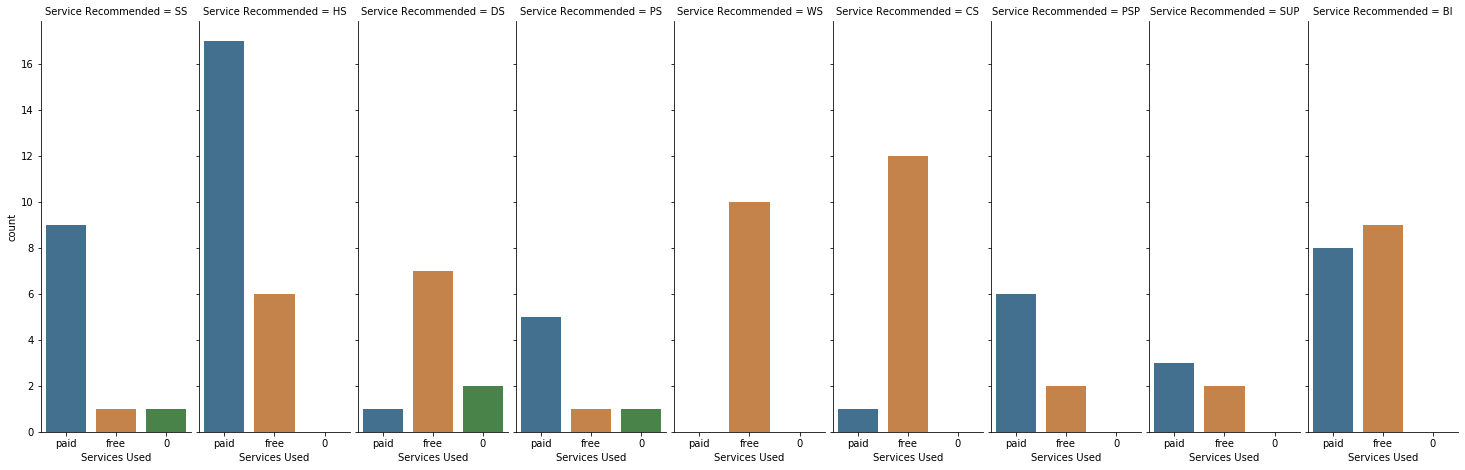

In [12]:
#To count no. of paid, free, 0 service in each recommended service
g = sns.factorplot("Services Used", col="Service Recommended",data=data,saturation=.5, kind="count", ci=None, size=5, aspect=.8)
g.fig.set_size_inches(20,7)

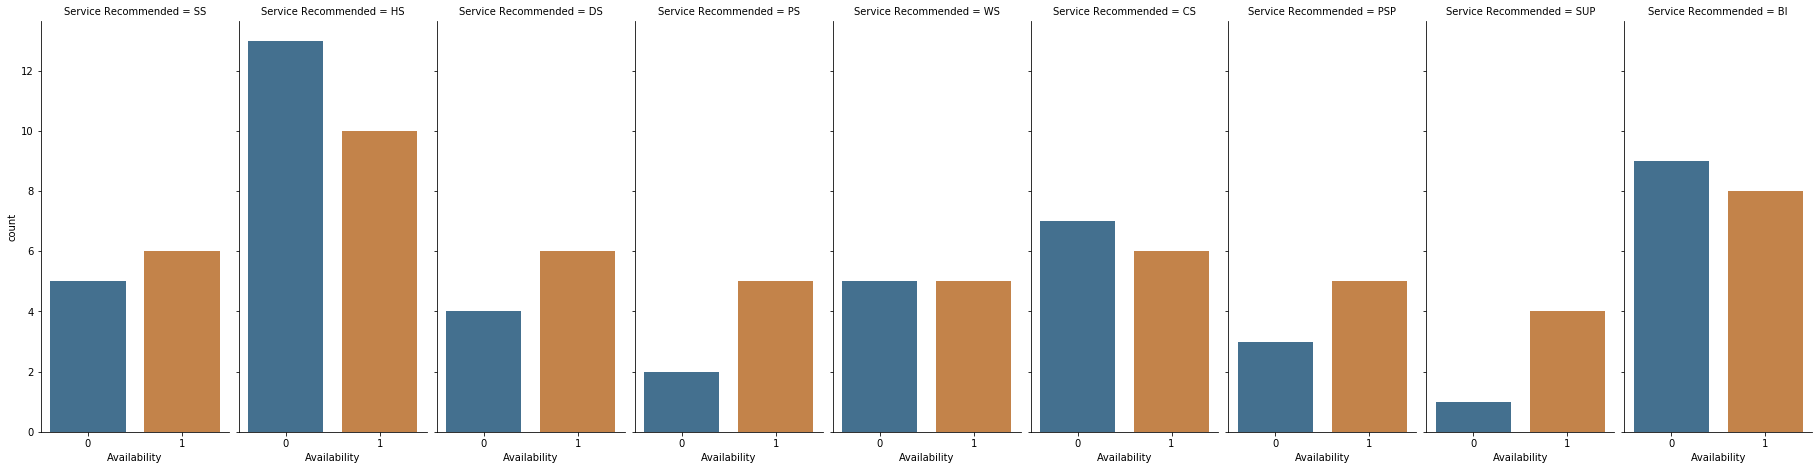

In [13]:
h = sns.factorplot("Availability", col="Service Recommended",data=data,saturation=.5, kind="count", ci=None, size=5, aspect=.8)
h.fig.set_size_inches(25,7)

In [14]:
ticket = pd.DataFrame(data.groupby('Service Recommended')['Number of Tickets raised'].mean())
ticket

,Number of Tickets raised
Service Recommended,
BI,3.117647
CS,2.846154
DS,1.100000
HS,4.565217
PS,8.857143
PSP,6.375000
SS,3.545455
SUP,2.600000
WS,2.500000


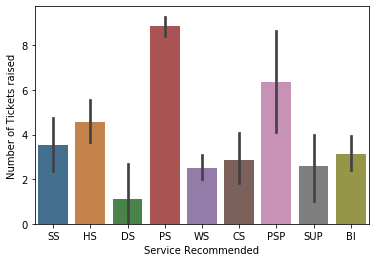

In [15]:
sns.barplot(x='Service Recommended', y='Number of Tickets raised', data=data , saturation = .5)

Text(0, 0.5, 'No of Ratings')

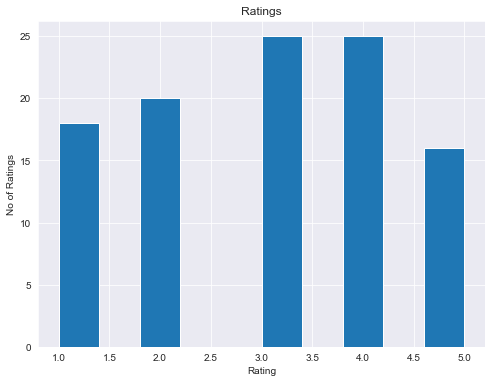

In [16]:
sns.set_style('dark')
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
data['Rating'].hist(bins=10)
plt.title('Ratings')
plt.xlabel('Rating')
plt.ylabel('No of Ratings')

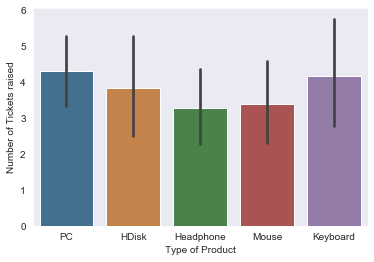

In [17]:
sns.barplot(x='Type of Product', y='Number of Tickets raised', data=data , saturation = .5)

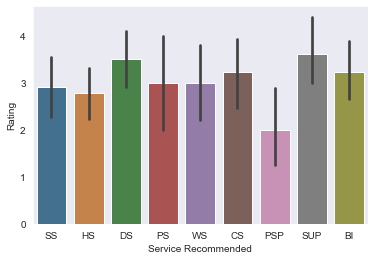

In [18]:
sns.barplot(x='Service Recommended', y='Rating', data=data , saturation = .5)

In [19]:
service_matrix = data.pivot_table(index=["Type of Product"],columns=["Service Recommended"], values=["Number of Tickets raised"])
service_matrix.head()

Number of Tickets raised                                  \
Service Recommended                       BI    CS        DS        HS    PS   
Type of Product                                                                
HDisk                                    NaN   NaN  0.000000  4.333333   9.0   
Headphone                           2.400000  4.00  0.750000  4.500000   9.0   
Keyboard                            3.333333  2.25  0.000000  4.166667   8.5   
Mouse                               3.428571  2.00  2.666667  4.666667  10.0   
PC                                  3.500000   NaN       NaN  6.500000   8.0   

                                                    
Service Recommended        PSP   SS  SUP        WS  
Type of Product                                     
HDisk                 4.000000  3.0  NaN       NaN  
Headphone                  NaN  NaN  NaN  1.000000  
Keyboard             10.000000  NaN  NaN       NaN  
Mouse                      NaN  NaN  NaN  2.000000  
PC                    6.166667  4.5  2.6  2.857143

In [20]:
service_correlations = service_matrix.corr(method = 'pearson')
service_correlations.head()

Number of Tickets raised  \
Service Recommended                                                BI   
                         Service Recommended                            
Number of Tickets raised BI                                  1.000000   
                         CS                                 -0.999517   
                         DS                                  0.325271   
                         HS                                  0.405611   
                         PS                                 -0.117789   

                                                                            \
Service Recommended                                 CS        DS        HS   
                         Service Recommended                                 
Number of Tickets raised BI                  -0.999517  0.325271  0.405611   
                         CS                   1.000000 -0.354497  0.075094   
                         DS                  -0.354497  1.000000  0.897239   
                         HS                   0.075094  0.897239  1.000000   
                         PS                  -0.300376  0.942466 -0.532181   

                                                                           \
Service Recommended                                 PS       PSP   SS SUP   
                         Service Recommended                                
Number of Tickets raised BI                  -0.117789 -1.000000  NaN NaN   
                         CS                  -0.300376       NaN  NaN NaN   
                         DS                   0.942466       NaN  NaN NaN   
                         HS                  -0.532181 -0.221237  1.0 NaN   
                         PS                   1.000000 -0.356555 -1.0 NaN   

                                                        
Service Recommended                                 WS  
                         Service Recommended            
Number of Tickets raised BI                   0.912616  
                         CS                  -1.000000  
                         DS                   1.000000  
                         HS                   0.881004  
                         PS                  -0.461084

In [21]:
service_matrix1 = data.pivot_table(index='Type of Product',columns='Service Recommended', values='Purchase Interval')
service_matrix1.head()

Service Recommended,BI,CS,DS,HS,PS,PSP,SS,SUP,WS
Type of Product,,,,,,,,,
HDisk,NaN,NaN,1.00,2.166667,2.0,4.000000,2.428571,NaN,NaN
Headphone,2.200000,1.40,2.75,2.166667,3.0,NaN,NaN,NaN,1.000000
Keyboard,1.000000,0.25,1.00,3.000000,2.0,6.000000,NaN,NaN,NaN
Mouse,1.857143,0.50,3.00,2.666667,2.0,NaN,NaN,NaN,1.000000
PC,2.500000,NaN,NaN,2.500000,2.0,4.166667,3.500000,3.0,1.142857


In [22]:
service_correlations1 = service_matrix1.corr(method = 'pearson', min_periods = 1)
service_correlations1.head()

Service Recommended,BI,CS,DS,HS,PS,PSP,SS,SUP,WS
Service Recommended,,,,,,,,,
BI,1.000000,0.848317,0.922613,-0.820221,0.319454,-1.000000,NaN,NaN,0.846154
CS,0.848317,1.000000,0.578431,-0.979973,0.978412,NaN,NaN,NaN,NaN
DS,0.922613,0.578431,1.000000,-0.187729,0.498161,NaN,NaN,NaN,NaN
HS,-0.820221,-0.979973,-0.187729,1.000000,-0.527046,0.944911,1.0,NaN,0.188982
PS,0.319454,0.978412,0.498161,-0.527046,1.000000,NaN,NaN,NaN,-0.500000


In [23]:
service_matrix2 = data.pivot_table(index="User id",columns="Type of Product", values="Rating")
service_matrix2.head()

Type of Product,HDisk,Headphone,Keyboard,Mouse,PC
User id,,,,,
1,4.0,NaN,NaN,NaN,4.0
2,NaN,3.0,NaN,3.0,4.0
3,NaN,2.0,NaN,NaN,NaN
5,NaN,NaN,3.5,NaN,NaN
6,2.0,NaN,1.0,NaN,2.0


In [24]:
service_correlations2 = service_matrix2.corr(method = 'pearson',min_periods = 1)
service_correlations2.head()

Type of Product,HDisk,Headphone,Keyboard,Mouse,PC
Type of Product,,,,,
HDisk,1.000000,0.733090,0.883883,-0.175035,0.221795
Headphone,0.733090,1.000000,0.565217,0.097590,0.836597
Keyboard,0.883883,0.565217,1.000000,-0.484795,0.104164
Mouse,-0.175035,0.097590,-0.484795,1.000000,0.456354
PC,0.221795,0.836597,0.104164,0.456354,1.000000


In [25]:
service_matrix3 = data.pivot_table(index="User id",columns="Type of Product", values="Purchase Interval")
service_matrix3.head()

Type of Product,HDisk,Headphone,Keyboard,Mouse,PC
User id,,,,,
1,1.0,NaN,NaN,NaN,4.0
2,NaN,2.0,NaN,2.0,3.0
3,NaN,1.5,NaN,NaN,NaN
5,NaN,NaN,0.0,NaN,NaN
6,4.0,NaN,3.0,NaN,4.0


In [26]:
service_correlations3 = service_matrix2.corr(method = 'pearson',min_periods = 1)
service_correlations3.head()

Type of Product,HDisk,Headphone,Keyboard,Mouse,PC
Type of Product,,,,,
HDisk,1.000000,0.733090,0.883883,-0.175035,0.221795
Headphone,0.733090,1.000000,0.565217,0.097590,0.836597
Keyboard,0.883883,0.565217,1.000000,-0.484795,0.104164
Mouse,-0.175035,0.097590,-0.484795,1.000000,0.456354
PC,0.221795,0.836597,0.104164,0.456354,1.000000


In [27]:
service_matrix4 = data.pivot_table(index="Service Recommended",columns="Type of Product", values="Rating")
service_matrix4.head()

Type of Product,HDisk,Headphone,Keyboard,Mouse,PC
Service Recommended,,,,,
BI,NaN,2.400000,3.333333,3.714286,3.5
CS,NaN,2.200000,3.750000,4.000000,NaN
DS,4.5,2.750000,4.000000,3.666667,NaN
HS,3.5,2.666667,2.166667,2.666667,3.0
PS,4.5,2.000000,1.500000,3.000000,4.0


In [28]:
service_correlations4 = service_matrix4.corr(method = 'pearson',min_periods = 1)
service_correlations4.head()

Type of Product,HDisk,Headphone,Keyboard,Mouse,PC
Type of Product,,,,,
HDisk,1.000000,-0.409644,0.333449,0.755929,0.972840
Headphone,-0.409644,1.000000,0.429777,0.369978,-0.919830
Keyboard,0.333449,0.429777,1.000000,0.855947,0.020966
Mouse,0.755929,0.369978,0.855947,1.000000,-0.385229
PC,0.972840,-0.919830,0.020966,-0.385229,1.000000


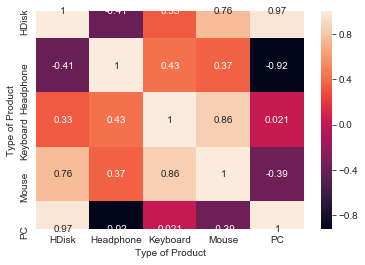

In [29]:
sns.heatmap(service_matrix4.corr(),annot=True)
#The lighter the colour , more the correlation

# Other recommended services for a product 

In [30]:
user = input("Enter the Product whose services you want : ")
p = service_matrix4[user]
p.dropna(axis=0,how=all)

Enter the Product whose services you want : HDisk


Service Recommended
DS     4.500000
HS     3.500000
PS     4.500000
PSP    2.000000
SS     3.142857
Name: HDisk, dtype: float64

# Using KNN Collaborative Filtering  

In [31]:
Ratings = pd.read_csv("rating.csv")
Mean = Ratings.groupby('User id',as_index = False).mean()
Mean.head()

,User id,Rating
0,1,4.000000
1,2,3.333333
2,3,2.000000
3,5,3.500000
4,6,1.666667


In [32]:
rating_avg=[]
rating_avg = pd.merge(data,Mean,on='User id')
rating_avg['adg_rating'] = rating_avg['Rating_x']-rating_avg['Rating_y']
rating_avg.head()

,User id,Type of Product,Purchase Interval,Warranty Expiry (months),Faulty software,Faulty hardware,Last BackUp,Antivirus Purchase (yrs),Services Used,Number of Tickets raised,Update Period,Wired/Wireless,Service Recommended,Rating_x,Availability,Rating_y,adg_rating
0,1,PC,4,0,Hang,Not Faulty,9,4,paid,1,1,-1,SS,4,1,4.000000,0.000000
1,1,HDisk,1,5,Not Faulty,Broken,4,1,free,2,2,Wired,HS,4,1,4.000000,0.000000
2,2,Headphone,2,5,-1,Not Faulty,-1,-1,free,0,-1,Wired,DS,3,1,3.333333,-0.333333
3,2,Mouse,2,0,-1,Broken,-1,-1,paid,10,-1,Wired,PS,3,1,3.333333,-0.333333
4,2,PC,3,1,Not Faulty,Battery,3,2,free,4,2,-1,WS,4,0,3.333333,0.666667


In [33]:
check3 = pd.pivot_table(rating_avg,values='Rating_x',index='User id',columns='Service Recommended').fillna(0)
check3.head()

Service Recommended,BI,CS,DS,HS,PS,PSP,SS,SUP,WS
User id,,,,,,,,,
1,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0
2,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,4.0
3,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0


In [34]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(check3)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [35]:
#Random User Recommendation distance
query_index = np.random.choice(check3.shape[0])
distances, indices = model_knn.kneighbors(check3.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print("Recommendation for {0} in \n".format(check3.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i,check3.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendation for 33 in 

1: 33, with distance of 0.0:
2: 3, with distance of 0.0:
3: 24, with distance of 0.0:
4: 9, with distance of 0.10557280900008414:
5: 34, with distance of 0.18076807948095952:


In [36]:
check2 = pd.pivot_table(data ,index = 'User id', columns = 'Service Recommended', values = 'Rating').fillna(0)
check2.head()

Service Recommended,BI,CS,DS,HS,PS,PSP,SS,SUP,WS
User id,,,,,,,,,
1,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0
2,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,4.0
3,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0


In [37]:
check2.shape

(42, 9)

In [38]:
X = check2.values.T
X.shape

(9, 42)

In [39]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(9, 9)

In [40]:
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
corr = np.corrcoef(matrix)
corr.shape

(9, 9)


# Finding similar services for a given service

In [42]:
product = check2.columns
list1 = list(product)
user = input("Enter the Service for which you need more recommendations : ")
pc = list1.index(user)
#print(pc)
print("The recommended services for " , user , "are: ")
corr_pc  = corr[pc]
list(product[(corr_pc<1.0) & (corr_pc>0.05)])

Enter the Service for which you need more recommendations : DS
The recommended services for  DS are: 


['BI', 'CS', 'HS', 'PS']

In [817]:
#user based
print("Mean rating given by each user: ")
Mean = Ratings.groupby('User id',as_index = False).mean()
Mean.head()

Mean rating given by each user: 


,User id,Rating
0,1,4.000000
1,2,3.333333
2,3,2.000000
3,5,3.500000
4,6,1.666667


In [818]:
rating_avg = pd.merge(data,Mean,on='User id')
rating_avg['adg_rating'] = rating_avg['Rating_x']-rating_avg['Rating_y']
rating_avg.head()
#Rating_x is rating
#Rating_y is the mean of ratings given by the respective users

,User id,Type of Product,Purchase Interval,Warranty Expiry (months),Faulty software,Faulty hardware,Last BackUp,Antivirus Purchase (yrs),Services Used,Number of Tickets raised,Update Period,Wired/Wireless,Service Recommended,Rating_x,Availability,Rating_y,adg_rating
0,1,PC,4,0,Hang,Not Faulty,9,4,paid,1,1,-1,SS,4,1,4.000000,0.000000
1,1,HDisk,1,5,Not Faulty,Broken,4,1,free,2,2,Wired,HS,4,1,4.000000,0.000000
2,2,Headphone,2,5,-1,Not Faulty,-1,-1,free,0,-1,Wired,DS,3,1,3.333333,-0.333333
3,2,Mouse,2,0,-1,Broken,-1,-1,paid,10,-1,Wired,PS,3,1,3.333333,-0.333333
4,2,PC,3,1,Not Faulty,Battery,3,2,free,4,2,-1,WS,4,0,3.333333,0.666667


In [819]:
check = pd.pivot_table(rating_avg,values='Rating_x',index='User id',columns='Service Recommended')
check.head()

Service Recommended,BI,CS,DS,HS,PS,PSP,SS,SUP,WS
User id,,,,,,,,,
1,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN
2,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,4.0
3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
5,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN


In [820]:
from sklearn.metrics.pairwise import cosine_similarity
final = pd.pivot_table(rating_avg,values='adg_rating',index='User id',columns='Service Recommended')
final.head()

Service Recommended,BI,CS,DS,HS,PS,PSP,SS,SUP,WS
User id,,,,,,,,,
1,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2,NaN,NaN,-0.333333,NaN,-0.333333,NaN,NaN,NaN,0.666667
3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,-0.666667,0.333333,NaN,NaN,NaN


In [821]:
final_service = final.fillna(final.mean(axis=0))
final_service.head()

Service Recommended,BI,CS,DS,HS,PS,PSP,SS,SUP,WS
User id,,,,,,,,,
1,-0.138889,0.063636,-0.101852,0.000000,-3.172066e-17,-0.214286,0.000000,0.458333,0.035417
2,-0.138889,0.063636,-0.333333,-0.019167,-3.333333e-01,-0.214286,0.124242,0.458333,0.666667
3,-0.138889,0.063636,-0.101852,0.000000,-3.172066e-17,-0.214286,0.124242,0.458333,0.035417
5,-0.138889,0.000000,-0.101852,-0.019167,-3.172066e-17,-0.214286,0.124242,0.458333,0.035417
6,-0.138889,0.063636,-0.101852,-0.019167,-6.666667e-01,0.333333,0.124242,0.458333,0.035417


In [822]:
final_user = final.apply(lambda row: row.fillna(row.mean()), axis=1)
final_user.head()

Service Recommended,BI,CS,DS,HS,PS,PSP,SS,SUP,WS
User id,,,,,,,,,
1,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2,-1.480297e-16,-1.480297e-16,-0.333333,-1.480297e-16,-0.333333,-1.480297e-16,-1.480297e-16,-1.480297e-16,0.666667
3,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
5,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
6,-1.666667e-01,-1.666667e-01,-0.166667,-1.666667e-01,-0.666667,3.333333e-01,-1.666667e-01,-1.666667e-01,-0.166667


In [823]:
b = cosine_similarity(final_user)
np.fill_diagonal(b,0)
similarity_with_user =pd.DataFrame(b,index=final_user.index)
similarity_with_user.columns=final_user.index
similarity_with_user.head()

User id,1,2,3,5,6,7,8,9,10,11,...,40,41,42,43,44,45,46,47,49,50
User id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.235702,0.0,5.640366e-32,3.666147e-33,-0.204665,0.471405,...,-0.112154,0.0,-3.666147e-33,-3.692745e-01,0.0,0.0,0.0,3.025836e-31,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0
5,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0
6,0.0,0.235702,0.0,0.0,0.000000,0.0,9.558970e-17,-1.247412e-17,-0.086832,0.333333,...,-0.237915,0.0,1.247412e-17,1.085542e-17,0.0,0.0,0.0,2.846911e-16,0.0,0.0


In [824]:
cosine = cosine_similarity(final_service)
np.fill_diagonal(cosine, 0 )
similarity_with_service = pd.DataFrame(cosine,index=final_service.index)
similarity_with_service.columns=final_user.index
similarity_with_service.head()

User id,1,2,3,5,6,7,8,9,10,11,...,40,41,42,43,44,45,46,47,49,50
User id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.636842,0.974484,0.966748,0.356211,0.973901,0.553217,0.527955,0.263009,0.457004,...,0.357240,0.956064,0.422569,0.371238,0.889469,0.606509,0.956064,0.608532,0.889469,0.974484
2,0.636842,0.000000,0.649028,0.646139,0.516373,0.649316,0.340828,0.349332,0.131400,0.557003,...,0.290421,0.596675,0.313966,0.028553,0.612477,0.304040,0.596675,0.326006,0.612477,0.649028
3,0.974484,0.649028,0.000000,0.992767,0.377986,0.999401,0.548524,0.545616,0.426797,0.467705,...,0.471953,0.982925,0.443220,0.523204,0.921376,0.464843,0.982925,0.515767,0.921376,1.000000
5,0.966748,0.646139,0.992767,0.000000,0.372871,0.993377,0.553261,0.594042,0.483546,0.492574,...,0.430224,0.975357,0.457244,0.517130,0.913859,0.439801,0.975357,0.487320,0.913859,0.992767
6,0.356211,0.516373,0.377986,0.372871,0.000000,0.378494,0.308875,0.177421,0.176566,0.199389,...,0.229179,0.363450,0.137090,0.242743,0.565246,0.126813,0.363450,0.167294,0.565246,0.377986


In [825]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

# Top 5 similar users and Services for a given user

In [43]:
#Top 5 user neighbours
sim_user_5_u = find_n_neighbours(similarity_with_user,5)
sim_user_5_u.head()

NameError: name 'find_n_neighbours' is not defined

In [44]:
#Top 5 service neighbours
sim_service_5_m = find_n_neighbours(similarity_with_service,5)
sim_service_5_m.head()

NameError: name 'find_n_neighbours' is not defined

In [45]:
def get_user_similar_services( user1, user2 ):
        common_services = rating_avg[rating_avg['User id'] == user1].merge(rating_avg[rating_avg['User id'] == user2],on = "Type of Product",how = "inner" )
        return common_services.merge( data, on = 'Type of Product' )

In [46]:
#Similarity we generated is true since users(1,2) have same ratings
a = get_user_similar_services(1,2)
a = a.loc[ : , ['Rating_x_x','Rating_x_y','Service Recommended']]
print("Similarity we generated is true since users(1,2) have same ratings")
a.head()

Similarity we generated is true since users(1,2) have same ratings


,Rating_x_x,Rating_x_y,Service Recommended
0,4,4,SS
1,4,4,WS
2,4,4,PSP
3,4,4,SUP
4,4,4,WS


# Comparing ratings of two different users 

In [48]:
#To check Ratings for other user (Give Input)
u1 = int(input("Enter first user id : "))
u2 = int(input("Enter second user id : "))
a = get_user_similar_services(u1,u2)
a = a.loc[ : , ['Rating_x_x','Rating_x_y','Service Recommended']]
a.head()

Enter first user id : 1
Enter second user id : 10


,Rating_x_x,Rating_x_y,Service Recommended
0,4,1,SS
1,4,1,WS
2,4,1,PSP
3,4,1,SUP
4,4,1,WS


# Score Calculation using ratings of other users similar to the user

In [831]:
#the function outputs a score that quantitatively tells us how strongly a user likes or prefers service i
def User_item_score(user,item):
    a = sim_user_5_u[sim_user_5_u.index==user].values
    b = a.squeeze().tolist()
    c = final_service.loc[:,item]
    d = c[c.index.isin(b)]
    f = d[d.notnull()]
    avg_user = Mean.loc[Mean['User id'] == user,'Rating'].values[0]
    index = f.index.values.squeeze().tolist()
    corr = similarity_with_service.loc[user,index]
    fin = pd.concat([f, corr], axis=1)
    fin.columns = ['adg_score','correlation']
    fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
    nume = fin['score'].sum()
    deno = fin['correlation'].sum()
    final_score = avg_user + (nume/deno)
    return final_score

In [50]:
u = int(input("Enter user id"))
s = input("Enter Service")
score = User_item_score(u,s)
print("score is",score)
if score < 3.5:
    print("Service should not be recommended")
elif score >=3.5 and score < 4:
    print("Service is moderately recommended")
else:
    print("Service is highly Recommended")

Enter user id10
Enter ServiceHDisk


NameError: name 'User_item_score' is not defined

In [833]:
rating_avg = rating_avg.astype({"Service Recommended": str})
service_user = rating_avg.groupby(by = 'User id')['Service Recommended'].apply(lambda x:','.join(x))
service_user.head()

User id
1         SS,HS
2      DS,PS,WS
3         HS,HS
5         CS,CS
6    PSP,PS,PSP
Name: Service Recommended, dtype: object

In [834]:
data.head()

,User id,Type of Product,Purchase Interval,Warranty Expiry (months),Faulty software,Faulty hardware,Last BackUp,Antivirus Purchase (yrs),Services Used,Number of Tickets raised,Update Period,Wired/Wireless,Service Recommended,Rating,Availability
0,1,PC,4,0,Hang,Not Faulty,9,4,paid,1,1,-1,SS,4,1
1,1,HDisk,1,5,Not Faulty,Broken,4,1,free,2,2,Wired,HS,4,1
2,2,Headphone,2,5,-1,Not Faulty,-1,-1,free,0,-1,Wired,DS,3,1
3,2,Mouse,2,0,-1,Broken,-1,-1,paid,10,-1,Wired,PS,3,1
4,2,PC,3,1,Not Faulty,Battery,3,2,free,4,2,-1,WS,4,0


In [835]:
data['Faulty software'] = data['Faulty software'].astype('category')
data['Faulty hardware'] = data['Faulty hardware'].astype('category')
data['Type of Product'] = data['Type of Product'].astype('category')
data['Antivirus Purchase (yrs)'] = data['Antivirus Purchase (yrs)'].astype('int64')
data['Services Used'] = data['Services Used'].astype('category')
data['Wired/Wireless'] = data['Wired/Wireless'].astype('category')
data['Service Recommended'] = data['Service Recommended'].astype('category')
#data['Type of Product'] = data['Type of Product'].astype('category') 
data['Type of Product'] = data['Type of Product'].astype('category') 

In [836]:
#print(data)
print(data.dtypes)

User id                        int64
Type of Product             category
Purchase Interval              int64
Warranty Expiry (months)       int64
Faulty software             category
Faulty hardware             category
Last BackUp                    int64
Antivirus Purchase (yrs)       int64
Services Used               category
Number of Tickets raised       int64
Update Period                  int64
Wired/Wireless              category
Service Recommended         category
Rating                         int64
Availability                   int64
dtype: object


In [837]:
LE = preprocessing.LabelEncoder()

In [838]:
data['Faulty software'] = LE.fit_transform(data['Faulty software'])
data['Faulty hardware'] = LE.fit_transform(data['Faulty hardware'])
data['Services Used'] = LE.fit_transform(data['Services Used'])
data['Wired/Wireless'] = LE.fit_transform(data['Wired/Wireless'])
data['Service Recommended'] = LE.fit_transform(data['Service Recommended'])
data['Type of Product'] = LE.fit_transform(data['Type of Product'])

In [839]:
data.head(10)

,User id,Type of Product,Purchase Interval,Warranty Expiry (months),Faulty software,Faulty hardware,Last BackUp,Antivirus Purchase (yrs),Services Used,Number of Tickets raised,Update Period,Wired/Wireless,Service Recommended,Rating,Availability
0,1,4,4,0,1,3,9,4,2,1,1,0,6,4,1
1,1,0,1,5,2,1,4,1,1,2,2,1,3,4,1
2,2,1,2,5,0,3,-1,-1,1,0,-1,1,2,3,1
3,2,3,2,0,0,1,-1,-1,2,10,-1,1,4,3,1
4,2,4,3,1,2,0,3,2,1,4,2,0,8,4,0
5,3,1,2,2,2,1,-1,-1,1,8,-1,1,3,1,1
6,3,1,1,2,0,1,-1,-1,1,5,-1,1,3,3,1
7,5,2,0,11,0,2,-1,-1,1,3,-1,2,1,5,0
8,5,2,0,8,0,2,-1,-1,1,3,-1,1,1,2,1
9,6,0,4,6,2,1,2,4,2,4,-1,1,5,2,1


In [840]:
bins = [-0.9,0.9,2,10]
labels = [1,2,3]
data['Purchase_binned'] = pd.cut(data['Purchase Interval'], bins=bins, labels=labels)

In [841]:
data.head()

,User id,Type of Product,Purchase Interval,Warranty Expiry (months),Faulty software,Faulty hardware,Last BackUp,Antivirus Purchase (yrs),Services Used,Number of Tickets raised,Update Period,Wired/Wireless,Service Recommended,Rating,Availability,Purchase_binned
0,1,4,4,0,1,3,9,4,2,1,1,0,6,4,1,3
1,1,0,1,5,2,1,4,1,1,2,2,1,3,4,1,2
2,2,1,2,5,0,3,-1,-1,1,0,-1,1,2,3,1,2
3,2,3,2,0,0,1,-1,-1,2,10,-1,1,4,3,1,2
4,2,4,3,1,2,0,3,2,1,4,2,0,8,4,0,3


In [842]:
bins = [-0.9,3,6,50]
labels = [1,2,3]
data['Warranty_binned'] = pd.cut(data['Warranty Expiry (months)'], bins=bins, labels=labels)

In [843]:
bins = [-1.9,-1,6,50]
labels = [1,2,3]
data['Backup_binned'] = pd.cut(data['Last BackUp'], bins=bins, labels=labels)

In [844]:
bins = [-1.9,-1,0.9,2,50]
labels = [1,2,3,4]
data['Antivirus_binned'] = pd.cut(data['Antivirus Purchase (yrs)'], bins=bins, labels=labels)

In [845]:
bins = [-0.9,6,50]
labels = [1,2]
data['Tickets_binned'] = pd.cut(data['Number of Tickets raised'], bins=bins, labels=labels)

In [846]:
bins = [-1.9,-0.9,1.9,50]
labels = [1,2,3]
data['Update_period_binned'] = pd.cut(data['Update Period'], bins=bins, labels=labels)

In [847]:
data2 = data.drop(['Purchase Interval','Availability','Warranty Expiry (months)','Last BackUp','Antivirus Purchase (yrs)','Number of Tickets raised','Update Period'], axis=1, inplace=True) 


In [848]:
data.head(10)

,User id,Type of Product,Faulty software,Faulty hardware,Services Used,Wired/Wireless,Service Recommended,Rating,Purchase_binned,Warranty_binned,Backup_binned,Antivirus_binned,Tickets_binned,Update_period_binned
0,1,4,1,3,2,0,6,4,3,1,3,4,1,2
1,1,0,2,1,1,1,3,4,2,2,2,3,1,3
2,2,1,0,3,1,1,2,3,2,2,1,1,1,1
3,2,3,0,1,2,1,4,3,2,1,1,1,2,1
4,2,4,2,0,1,0,8,4,3,1,2,3,1,3
5,3,1,2,1,1,1,3,1,2,1,1,1,2,1
6,3,1,0,1,1,1,3,3,2,1,1,1,1,1
7,5,2,0,2,1,2,1,5,1,3,1,1,1,1
8,5,2,0,2,1,1,1,2,1,3,1,1,1,1
9,6,0,2,1,2,1,5,2,3,2,2,4,1,1


# Accuracy Prediction using Different Models

In [849]:
from sklearn.model_selection import train_test_split 

In [850]:
dataset = data
y = dataset['Service Recommended']
del dataset['Service Recommended']
X = dataset

In [851]:
X.head()

,User id,Type of Product,Faulty software,Faulty hardware,Services Used,Wired/Wireless,Rating,Purchase_binned,Warranty_binned,Backup_binned,Antivirus_binned,Tickets_binned,Update_period_binned
0,1,4,1,3,2,0,4,3,1,3,4,1,2
1,1,0,2,1,1,1,4,2,2,2,3,1,3
2,2,1,0,3,1,1,3,2,2,1,1,1,1
3,2,3,0,1,2,1,3,2,1,1,1,2,1
4,2,4,2,0,1,0,4,3,1,2,3,1,3


In [852]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state = 100)

In [853]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
Ypred=lr.predict(X_test)
for j,k in zip(y_test,Ypred):
    print(j,k,sep='-->')

3-->3.513998404556996
3-->3.696345846910444
6-->6.607842168153125
3-->4.510774803163288
6-->6.218195578314373
2-->3.8010529658543053
1-->1.2751243825419663
8-->5.506990338991786
4-->2.5168214325318576
3-->2.9745788948187775
4-->1.7912488351165106
6-->5.246002904555686
5-->6.111447978188947
0-->1.5176976394128598
1-->1.5389182787475184
7-->6.934362526260909
1-->1.832940719304425
0-->4.855824993587964
3-->2.926019997507445
0-->1.7266066408696952
3-->5.691340150822695
8-->4.650418110930747
8-->5.718165353638114
5-->7.08429428082345
0-->2.149719576223477
2-->2.1955363523345097


In [854]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,Ypred)

3.246049224989813

In [855]:
#K - Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
Ypred=knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,Ypred)
print(cm)

[[3 0 0 1 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0]
 [1 2 1 1 1 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0]
 [0 0 2 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 1]]


In [856]:
print(classification_report(y_test,Ypred))  

              precision    recall  f1-score   support

           0       0.33      0.75      0.46         4
           1       0.38      1.00      0.55         3
           2       0.00      0.00      0.00         2
           3       0.50      0.17      0.25         6
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           8       1.00      0.33      0.50         3

    accuracy                           0.31        26
   macro avg       0.25      0.25      0.20        26
weighted avg       0.33      0.31      0.25        26



In [857]:
#SVM
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

In [858]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         2
           3       0.33      1.00      0.50         6
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           8       1.00      0.33      0.50         3

    accuracy                           0.46        26
   macro avg       0.31      0.31      0.28        26
weighted avg       0.38      0.46      0.37        26



In [859]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
predicted = model.predict(X_test)
print(predicted)

[4 3 6 3 6 1 1 8 1 1 1 6 5 1 1 7 1 0 1 1 5 8 8 4 8 1]


In [860]:
from sklearn import metrics
print("Accuracy: " ,metrics.accuracy_score(y_test,predicted))

Accuracy:  0.5384615384615384


In [861]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
Ypred3=lr.predict(X_test)
for j,k in zip(y_test,Ypred3):
    print(j,k,sep='-->')

3-->4
3-->3
6-->7
3-->5
6-->7
2-->2
1-->1
8-->8
4-->1
3-->3
4-->1
6-->6
5-->5
0-->0
1-->1
7-->7
1-->1
0-->5
3-->1
0-->0
3-->5
8-->8
8-->5
5-->5
0-->0
2-->1


In [862]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,Ypred3)
print(cm2)

[[3 0 0 0 0 1 0 0 0]
 [0 3 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0]
 [0 1 0 2 1 2 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 1 2 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 2]]


In [863]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Ypred3))  

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.43      1.00      0.60         3
           2       1.00      0.50      0.67         2
           3       1.00      0.33      0.50         6
           4       0.00      0.00      0.00         2
           5       0.33      1.00      0.50         2
           6       1.00      0.33      0.50         3
           7       0.33      1.00      0.50         1
           8       1.00      0.67      0.80         3

    accuracy                           0.58        26
   macro avg       0.68      0.62      0.55        26
weighted avg       0.78      0.58      0.58        26



In [864]:
print(lr.score(X_test,y_test))

0.5769230769230769


In [865]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
Ypred1=dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
cm1=confusion_matrix(y_test,Ypred1)
print(cm1)

[[2 0 0 0 0 0 0 0 2]
 [0 3 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0]
 [0 0 1 0 0 1 0 0 0]
 [0 1 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 3]]


In [866]:
print(classification_report(y_test,Ypred1))  

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.60      1.00      0.75         3
           2       0.50      0.50      0.50         2
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         2
           5       1.00      0.50      0.67         2
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         1
           8       0.60      1.00      0.75         3

    accuracy                           0.81        26
   macro avg       0.86      0.80      0.79        26
weighted avg       0.87      0.81      0.80        26

